In [2]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline


In [3]:
df = pd.read_csv("./Training.csv")
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [5]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [6]:
df.keys()

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

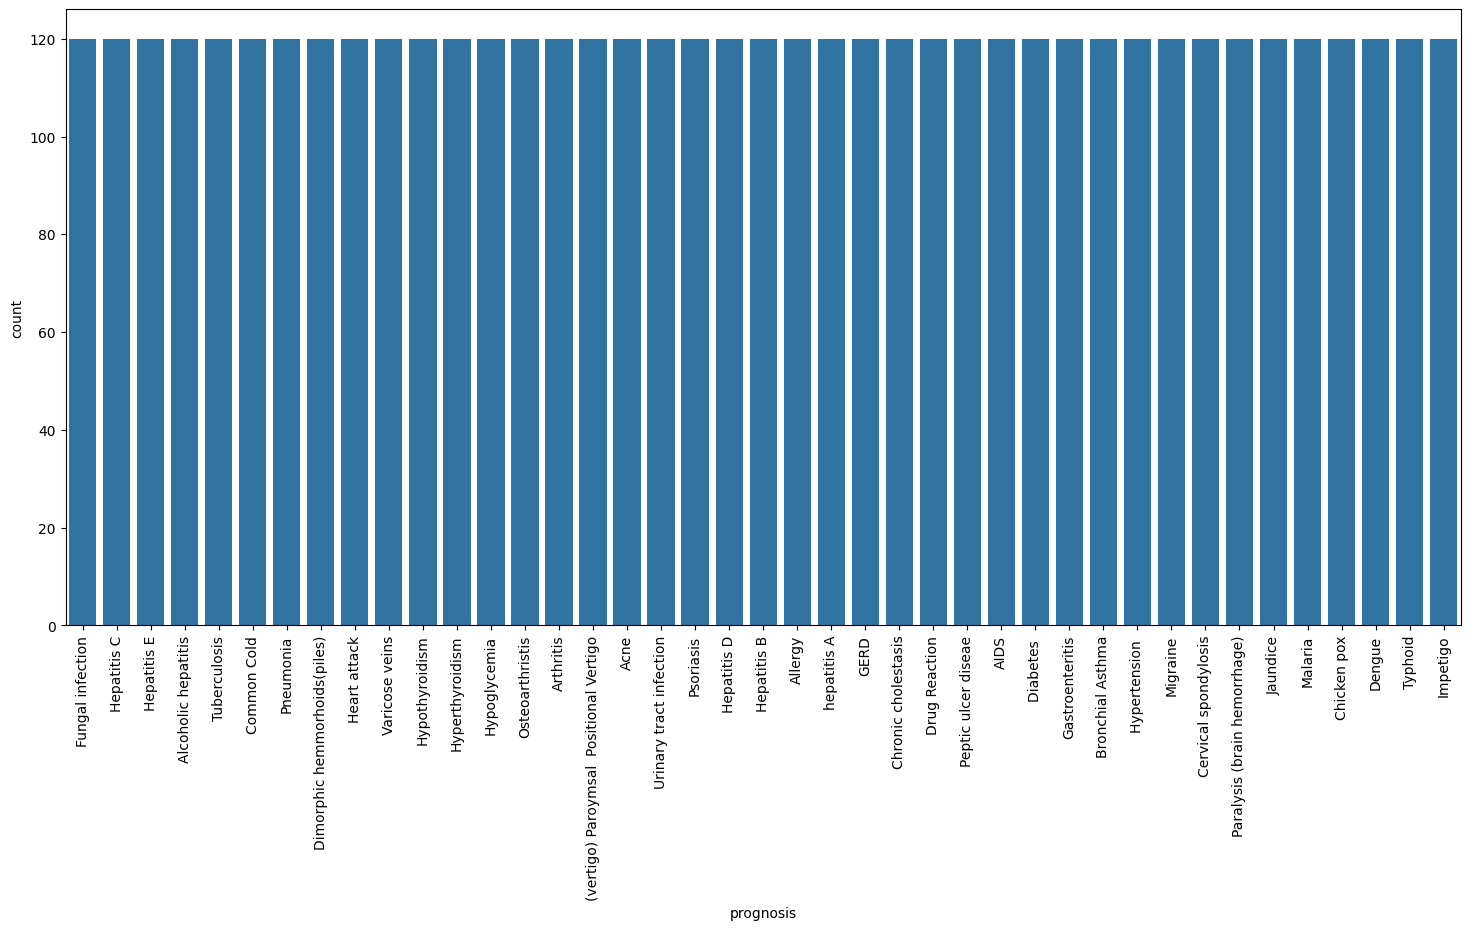

In [7]:
x = df['prognosis']

plt.figure(figsize=(18, 8))
sns.barplot(x=x.value_counts().index, y=x.value_counts())
plt.xticks(rotation=90)
plt.show()


In [8]:
# Ecode the values
encoder = LabelEncoder()
df["prognosis"] = encoder.fit_transform(df["prognosis"])
df.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15,NaN


In [9]:
df1 = df.drop("Unnamed: 133",axis=1)

x = df1.drop("prognosis",axis=1)

y = df1["prognosis"]


In [10]:
X_train, X_test, y_train, y_test =train_test_split(
x, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [11]:
model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)




1.0

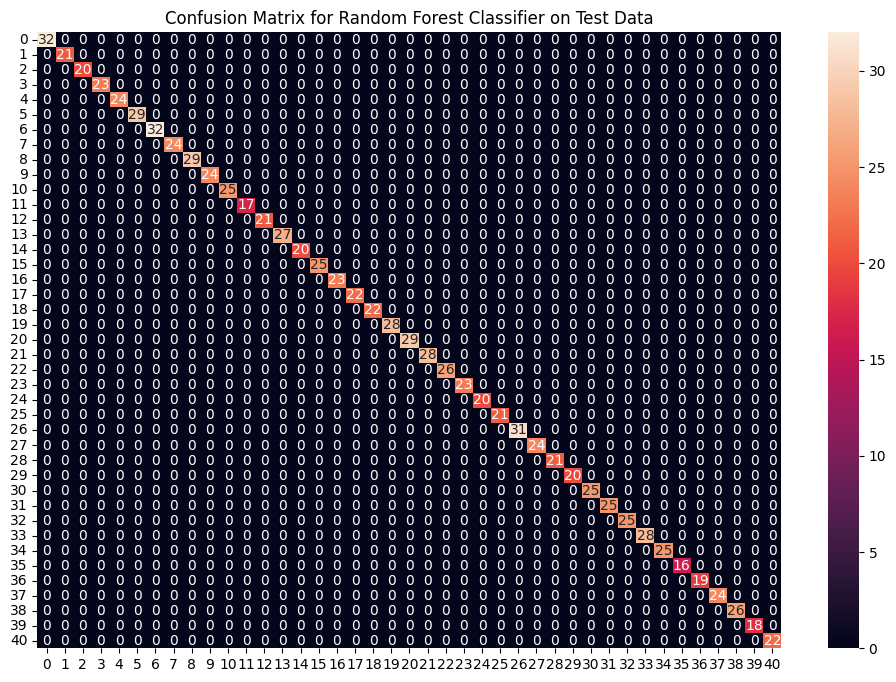

In [12]:
c_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(c_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

In [13]:
symptoms = x.columns.values

# Map formatted symptom names to indices
symptom_index = {
    " ".join([i.capitalize() for i in value.split("_")]): index
    for index, value in enumerate(x.columns.values)
}

# Store symptom index and prediction classes
data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}

def predictDisease(symptoms):
    
    symptoms = symptoms.split(",")
    input_data = [0] * len(data_dict["symptom_index"])
    
    
    for symptom in symptoms:
        input_data[data_dict["symptom_index"][symptom]] = 1
    
    model_predicted_value = model.predict([input_data])
    return data_dict["predictions_classes"][model_predicted_value[0]]


print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))


Fungal infection


C:\Users\SHOHAN_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [14]:
symptom_index

{'Itching': 0,
 'Skin Rash': 1,
 'Nodal Skin Eruptions': 2,
 'Continuous Sneezing': 3,
 'Shivering': 4,
 'Chills': 5,
 'Joint Pain': 6,
 'Stomach Pain': 7,
 'Acidity': 8,
 'Ulcers On Tongue': 9,
 'Muscle Wasting': 10,
 'Vomiting': 11,
 'Burning Micturition': 12,
 'Spotting  urination': 13,
 'Fatigue': 14,
 'Weight Gain': 15,
 'Anxiety': 16,
 'Cold Hands And Feets': 17,
 'Mood Swings': 18,
 'Weight Loss': 19,
 'Restlessness': 20,
 'Lethargy': 21,
 'Patches In Throat': 22,
 'Irregular Sugar Level': 23,
 'Cough': 24,
 'High Fever': 25,
 'Sunken Eyes': 26,
 'Breathlessness': 27,
 'Sweating': 28,
 'Dehydration': 29,
 'Indigestion': 30,
 'Headache': 31,
 'Yellowish Skin': 32,
 'Dark Urine': 33,
 'Nausea': 34,
 'Loss Of Appetite': 35,
 'Pain Behind The Eyes': 36,
 'Back Pain': 37,
 'Constipation': 38,
 'Abdominal Pain': 39,
 'Diarrhoea': 40,
 'Mild Fever': 41,
 'Yellow Urine': 42,
 'Yellowing Of Eyes': 43,
 'Acute Liver Failure': 44,
 'Fluid Overload': 45,
 'Swelling Of Stomach': 46,
 'Swelle

Model Save

In [15]:
import joblib
joblib.dump(model, 'Disease Prediction.joblib')

['Disease Prediction.joblib']